Step 1: Load data (bears without splitting) that was used in Phase I

In [ ]:
! unzip bearsWithoutSplitting.zip

Archive:  bearsWithoutSplitting.zip
   creating: bearsWithoutSplitting/
   creating: bearsWithoutSplitting/polar/
  inflating: bearsWithoutSplitting/.DS_Store  
  inflating: __MACOSX/bearsWithoutSplitting/._.DS_Store  
   creating: bearsWithoutSplitting/panda/
   creating: bearsWithoutSplitting/grizzly/
  inflating: bearsWithoutSplitting/polar/polar_1198.jpg  
  inflating: __MACOSX/bearsWithoutSplitting/polar/._polar_1198.jpg  
  inflating: bearsWithoutSplitting/polar/polar_1365.png  
  inflating: __MACOSX/bearsWithoutSplitting/polar/._polar_1365.png  
  inflating: bearsWithoutSplitting/polar/polar_1173.jpg  
  inflating: __MACOSX/bearsWithoutSplitting/polar/._polar_1173.jpg  
  inflating: bearsWithoutSplitting/polar/polar_1167.jpg  
  inflating: __MACOSX/bearsWithoutSplitting/polar/._polar_1167.jpg  
  inflating: bearsWithoutSplitting/polar/polar_1359.jpg  
  inflating: __MACOSX/bearsWithoutSplitting/polar/._polar_1359.jpg  
  inflating: bearsWithoutSplitting/polar/polar_1371.jpg  
  

Step 2: Create a generator for the entire dataset and rescale all the images

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(
    rescale=1./255)

In [ ]:
#Generator for all of the data
all_generator = my_generator.flow_from_directory(
    './bearsWithoutSplitting/',
    target_size=(48, 48),
    batch_size=4,
    class_mode='categorical',
    )

Found 1198 images belonging to 3 classes.


Step 3: Verify that generators are working and display an image

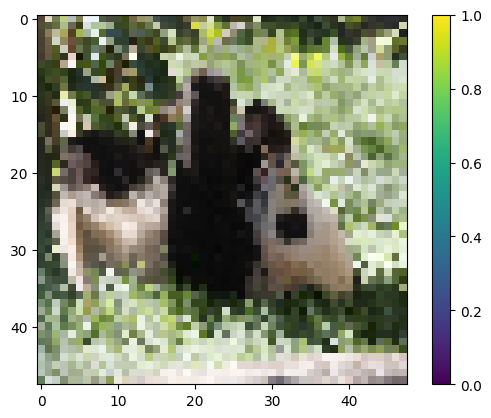

(48, 48, 3)
[0. 1. 0.]


In [ ]:
import matplotlib.pyplot as plt
for my_batch in all_generator:
    # my_batch is a tuple with images and labels
    images = my_batch[0]
    labels = my_batch[1]
    for i in range(len(labels)):
        # Gives one image and its corresponding label
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()
        print(images[i].shape)
        print(labels[i])
        break
    break

Step 4: Build a model and display its structure

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = (48, 48, 3) ) )
model.add(layers.MaxPooling2D(4, 4) )
model.add(layers.Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add(layers.MaxPooling2D(2, 2) )
model.add(layers.Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 32, activation = 'relu' ) )
model.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 16)          4624      
                                                                 
 flatten_1 (Flatten)         (None, 64)               

Model Summary in Graphical Form

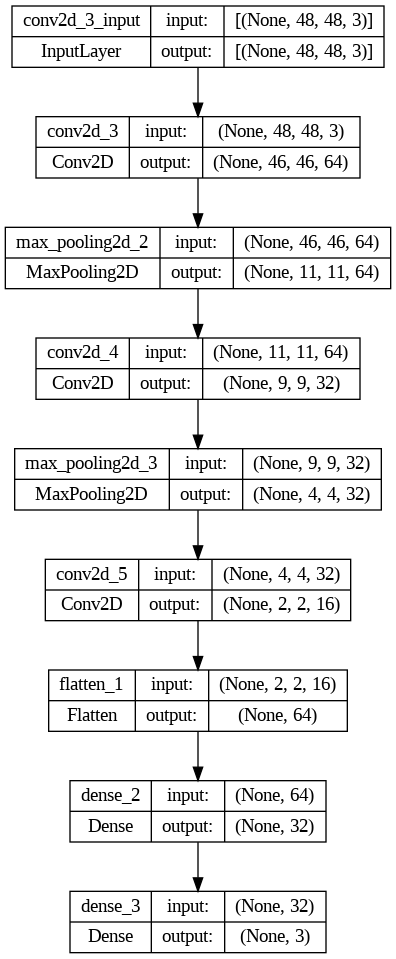

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

Step 5: Implement EarlyStopping to cease training once threshold reaches 100 percent

In [ ]:
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint

callback_earlyStopping = EarlyStopping(monitor='accuracy', baseline=1.0, patience=0)

class ThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(ThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs["accuracy"]
        if accuracy >= self.threshold:
            self.model.stop_training = True


callback=ThresholdCallback(threshold=1.0)

In [ ]:
from tensorflow.keras.metrics import Recall, Precision
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

Step 6: Train the model on one training set

In [ ]:
history = model.fit(all_generator, epochs = 40, batch_size = 32, callbacks=[callback])

Epoch 1/40
300/300 [==============================] - 10s 26ms/step - loss: 0.8034 - accuracy: 0.6018 - precision_2: 0.7474 - recall_2: 0.4199
Epoch 2/40
300/300 [==============================] - 8s 27ms/step - loss: 0.4633 - accuracy: 0.8180 - precision_2: 0.8459 - recall_2: 0.7880
Epoch 3/40
300/300 [==============================] - 8s 28ms/step - loss: 0.3535 - accuracy: 0.8648 - precision_2: 0.8863 - recall_2: 0.8523
Epoch 4/40
300/300 [==============================] - 7s 24ms/step - loss: 0.3157 - accuracy: 0.8765 - precision_2: 0.8894 - recall_2: 0.8656
Epoch 5/40
300/300 [==============================] - 8s 27ms/step - loss: 0.2973 - accuracy: 0.8865 - precision_2: 0.8981 - recall_2: 0.8756
Epoch 6/40
300/300 [==============================] - 8s 27ms/step - loss: 0.2475 - accuracy: 0.9057 - precision_2: 0.9118 - recall_2: 0.8973
Epoch 7/40
300/300 [==============================] - 7s 25ms/step - loss: 0.2477 - accuracy: 0.9174 - precision_2: 0.9252 - recall_2: 0.9090
Epoch

Step 7: Display the learning curve of the data not having been split

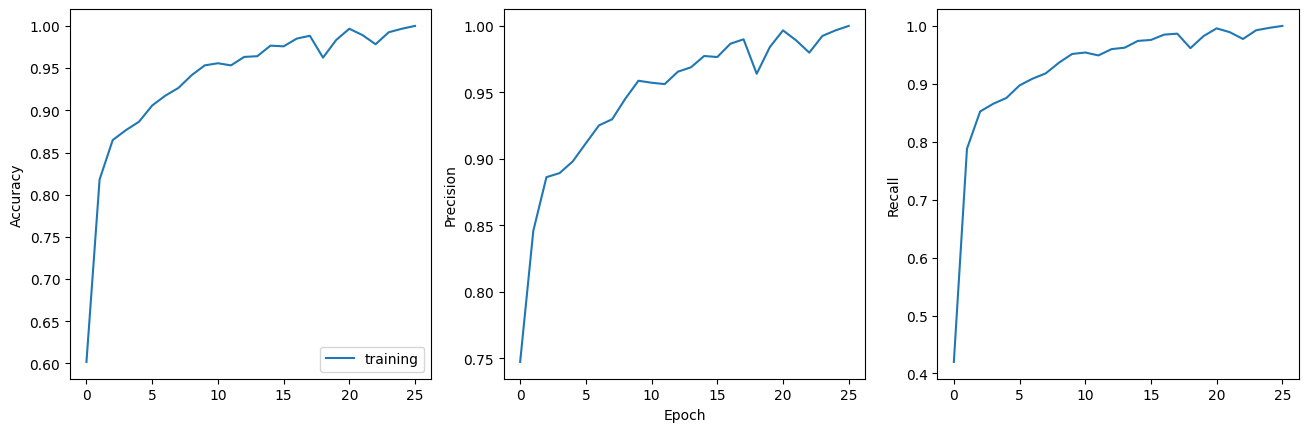

In [ ]:
plt.subplots_adjust(right=1.95, left=.03)

plt.subplot(1,3,1)
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('')
plt.legend(['training','validation'], loc="lower right")

plt.subplot(1,3,2)
plt.plot(history.history['precision_2'])
#plt.plot(history.history['val_precision'])
plt.ylabel('Precision')
plt.xlabel('Epoch')

plt.subplot(1,3,3)
plt.plot(history.history['recall_2'])
#plt.plot(history.history['val_recall'])
plt.ylabel('Recall')
plt.xlabel('')


plt.show()

In [ ]:
test_loss, test_acc, test_precision, test_recall = model.evaluate(all_generator)
print('%s %.2f' % ('validation_acc: ', test_acc*100.0 ))
print('%s %.2f' % ('validation_loss:', test_loss ))
print('%s %.2f' % ('validation_precision:', test_precision ))
print('%s %.2f' % ('validation_recall:', test_recall ))

300/300 [==============================] - 8s 27ms/step - loss: 0.0012 - accuracy: 1.0000 - precision_2: 1.0000 - recall_2: 1.0000
validation_acc:  100.00
validation_loss: 0.00
validation_precision: 1.00
validation_recall: 1.00


Create a model with less parameters

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras import datasets, layers, models

model2 = models.Sequential()
model2.add(layers.Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape = (48, 48, 3) ) )
model2.add(layers.MaxPooling2D(4, 4) )
model2.add(layers.Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model2.add(layers.MaxPooling2D(2, 2) )
model2.add(layers.Conv2D( 8, ( 3, 3 ), activation = 'relu' ) )
model2.add( Flatten() )
model2.add( Dense( 32, activation = 'relu' ) )
model2.add( Dense( 3, activation = 'softmax' ) )
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 9, 9, 16)          4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 2, 2, 8)           1160      
                                                                 
 flatten_2 (Flatten)         (None, 32)               

In [ ]:
model2.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
history2 = model2.fit(all_generator, epochs = 40, batch_size = 32, callbacks=[callback])

Epoch 1/40
300/300 [==============================] - 10s 25ms/step - loss: 0.8275 - accuracy: 0.5927 - precision_3: 0.7245 - recall_3: 0.3907
Epoch 2/40
300/300 [==============================] - 9s 28ms/step - loss: 0.5205 - accuracy: 0.7821 - precision_3: 0.8095 - recall_3: 0.7379
Epoch 3/40
300/300 [==============================] - 8s 28ms/step - loss: 0.4250 - accuracy: 0.8306 - precision_3: 0.8501 - recall_3: 0.8097
Epoch 4/40
300/300 [==============================] - 9s 29ms/step - loss: 0.3561 - accuracy: 0.8573 - precision_3: 0.8691 - recall_3: 0.8422
Epoch 5/40
300/300 [==============================] - 8s 27ms/step - loss: 0.3219 - accuracy: 0.8731 - precision_3: 0.8844 - recall_3: 0.8623
Epoch 6/40
300/300 [==============================] - 8s 27ms/step - loss: 0.2872 - accuracy: 0.8907 - precision_3: 0.9013 - recall_3: 0.8840
Epoch 7/40
300/300 [==============================] - 8s 28ms/step - loss: 0.2759 - accuracy: 0.8898 - precision_3: 0.9065 - recall_3: 0.8823
Epoch

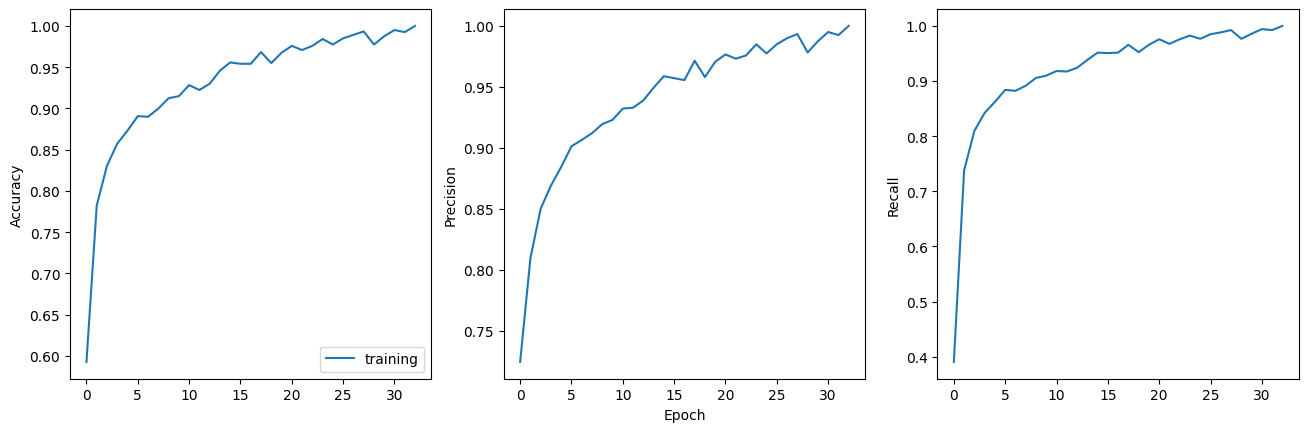

In [ ]:
plt.subplots_adjust(right=1.95, left=.03)

plt.subplot(1,3,1)
plt.plot(history2.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('')
plt.legend(['training','validation'], loc="lower right")

plt.subplot(1,3,2)
plt.plot(history2.history['precision_3'])
#plt.plot(history.history['val_precision'])
plt.ylabel('Precision')
plt.xlabel('Epoch')

plt.subplot(1,3,3)
plt.plot(history2.history['recall_3'])
#plt.plot(history.history['val_recall'])
plt.ylabel('Recall')
plt.xlabel('')


plt.show()

In [ ]:
test_loss, test_acc, test_precision, test_recall = model2.evaluate(all_generator)
print('%s %.2f' % ('validation_acc: ', test_acc*100.0 ))
print('%s %.2f' % ('validation_loss:', test_loss ))
print('%s %.2f' % ('validation_precision:', test_precision ))
print('%s %.2f' % ('validation_recall:', test_recall ))

300/300 [==============================] - 8s 24ms/step - loss: 0.0025 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000
validation_acc:  100.00
validation_loss: 0.00
validation_precision: 1.00
validation_recall: 1.00


Task 2: Split and Evaluate on Test Set

Load and Split the data into 3 groups: training, validation, and testing

In [ ]:
! unzip bears_ws.zip

Archive:  bears_ws.zip
   creating: bears/
  inflating: bears/.DS_Store         
  inflating: __MACOSX/bears/._.DS_Store  
   creating: bears/test/
   creating: bears/training/
   creating: bears/validation/
   creating: bears/test/polar/
  inflating: bears/test/.DS_Store    
  inflating: __MACOSX/bears/test/._.DS_Store  
   creating: bears/test/panda/
   creating: bears/test/grizzly/
   creating: bears/training/polar/
  inflating: bears/training/.DS_Store  
  inflating: __MACOSX/bears/training/._.DS_Store  
   creating: bears/training/panda/
   creating: bears/training/grizzly/
   creating: bears/validation/polar/
  inflating: bears/validation/.DS_Store  
  inflating: __MACOSX/bears/validation/._.DS_Store  
   creating: bears/validation/panda/
   creating: bears/validation/grizzly/
  inflating: bears/test/polar/polar_1198.jpg  
  inflating: bears/test/polar/polar_1167.jpg  
  inflating: bears/test/polar/polar_1359.jpg  
  inflating: bears/test/polar/polar_1012.jpg  
  inflating: bears

Create 3 seperate data generators for training,
validation, and testing

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255)

train_ds = datagen.flow_from_directory(
  './bears/training/',
  target_size=(48, 48),
  shuffle=True,
  batch_size=32)

valid_ds = datagen.flow_from_directory(
  './bears/validation/',
  target_size=(48, 48),
  shuffle=True,
  batch_size=32)

test_ds = datagen.flow_from_directory(
    './bears/test/',
    target_size=(48, 48),
    shuffle=True,
    batch_size=32
)

Found 718 images belonging to 3 classes.
Found 240 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


Model for the Split Data

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras import datasets, layers, models

model3 = models.Sequential()

model3.add(layers.Conv2D( 64, ( 3, 3 ), activation = 'relu',
                        input_shape = (48, 48, 3) ) )
model3.add(layers.MaxPooling2D(4, 4) )
model3.add(layers.Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model3.add(layers.MaxPooling2D(2, 2) )
model3.add(layers.Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model3.add( Flatten() )
model3.add( Dense( 32, activation = 'relu' ) )
model3.add( Dense( 3, activation = 'softmax' ) )

Model Summary

In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 46, 46, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 2, 32)          9248      
                                                                 
 flatten_3 (Flatten)         (None, 128)              

Compile the model

In [ ]:
model3.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

Train the model on split data

In [ ]:
history3 = model3.fit(train_ds, epochs=40, validation_data=valid_ds, batch_size=32, callbacks = [callback])

Epoch 1/40
23/23 [==============================] - 8s 243ms/step - loss: 1.0146 - accuracy: 0.4833 - precision_4: 0.7172 - recall_4: 0.0989 - val_loss: 0.8732 - val_accuracy: 0.5667 - val_precision_4: 0.6641 - val_recall_4: 0.3542
Epoch 2/40
23/23 [==============================] - 6s 268ms/step - loss: 0.7322 - accuracy: 0.6212 - precision_4: 0.7300 - recall_4: 0.4708 - val_loss: 0.7777 - val_accuracy: 0.5875 - val_precision_4: 0.6453 - val_recall_4: 0.5458
Epoch 3/40
23/23 [==============================] - 5s 222ms/step - loss: 0.6538 - accuracy: 0.6685 - precision_4: 0.7083 - recall_4: 0.6086 - val_loss: 0.6825 - val_accuracy: 0.6458 - val_precision_4: 0.6713 - val_recall_4: 0.6042
Epoch 4/40
23/23 [==============================] - 6s 271ms/step - loss: 0.5530 - accuracy: 0.7730 - precision_4: 0.8016 - recall_4: 0.7089 - val_loss: 0.5958 - val_accuracy: 0.7375 - val_precision_4: 0.7671 - val_recall_4: 0.7000
Epoch 5/40
23/23 [==============================] - 5s 231ms/step - loss

Learning curves

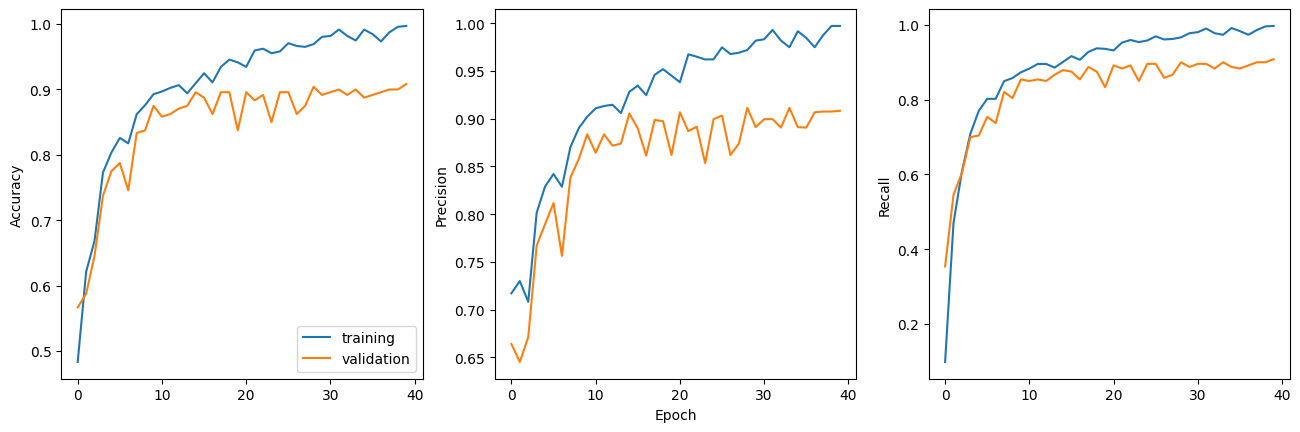

In [ ]:
plt.subplots_adjust(right=1.95, left=.03)

plt.subplot(1,3,1)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('')
plt.legend(['training','validation'], loc="lower right")

plt.subplot(1,3,2)
plt.plot(history3.history['precision_4'])
plt.plot(history3.history['val_precision_4'])
plt.ylabel('Precision')
plt.xlabel('Epoch')

plt.subplot(1,3,3)
plt.plot(history3.history['recall_4'])
plt.plot(history3.history['val_recall_4'])
plt.ylabel('Recall')
plt.xlabel('')


plt.show()

In [ ]:
test_loss, test_acc, test_precision, test_recall = model3.evaluate(test_ds)
print('%s %.2f' % ('validation_acc: ', test_acc*100.0 ))
print('%s %.2f' % ('validation_loss:', test_loss ))
print('%s %.2f' % ('validation_precision:', test_precision ))
print('%s %.2f' % ('validation_recall:', test_recall ))

8/8 [==============================] - 1s 156ms/step - loss: 0.4183 - accuracy: 0.8792 - precision_4: 0.8792 - recall_4: 0.8792
validation_acc:  87.92
validation_loss: 0.42
validation_precision: 0.88
validation_recall: 0.88


Decrease the parameters

In [ ]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Conv2D, Flatten
#from tensorflow.keras import datasets, layers, models

model4 = models.Sequential()

model4.add(layers.Conv2D( 32, ( 3, 3 ), activation = 'relu',
                        input_shape = (48, 48, 3) ) )
model4.add(layers.MaxPooling2D(4, 4) )
model4.add(layers.Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model4.add(layers.MaxPooling2D(2, 2) )
model4.add(layers.Conv2D( 8, ( 3, 3 ), activation = 'relu' ) )
model4.add( Flatten() )
model4.add( Dense( 32, activation = 'relu' ) )
model4.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 9, 9, 16)          4624      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 2, 2, 8)           1160      
                                                                 
 flatten_4 (Flatten)         (None, 32)               

Compile the model

In [ ]:
model4.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

Train the model

In [ ]:
history4 = model4.fit(train_ds, epochs=40, validation_data=valid_ds, batch_size=32, callbacks = [callback])

Epoch 1/40
23/23 [==============================] - 9s 291ms/step - loss: 1.0835 - accuracy: 0.3510 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 1.0419 - val_accuracy: 0.4292 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 2/40
23/23 [==============================] - 5s 227ms/step - loss: 0.9638 - accuracy: 0.5975 - precision_5: 0.8333 - recall_5: 0.0557 - val_loss: 0.8407 - val_accuracy: 0.6250 - val_precision_5: 0.7742 - val_recall_5: 0.4000
Epoch 3/40
23/23 [==============================] - 7s 303ms/step - loss: 0.7395 - accuracy: 0.6421 - precision_5: 0.7278 - recall_5: 0.5028 - val_loss: 0.6878 - val_accuracy: 0.6958 - val_precision_5: 0.7327 - val_recall_5: 0.6167
Epoch 4/40
23/23 [==============================] - 5s 231ms/step - loss: 0.6222 - accuracy: 0.7326 - precision_5: 0.7750 - recall_5: 0.6379 - val_loss: 0.6355 - val_accuracy: 0.6958 - val_precision_5: 0.7416 - val_recall_5: 0.6458
Epoch 5/40
23/23 [==============================] - 5s 2

Learning Curves

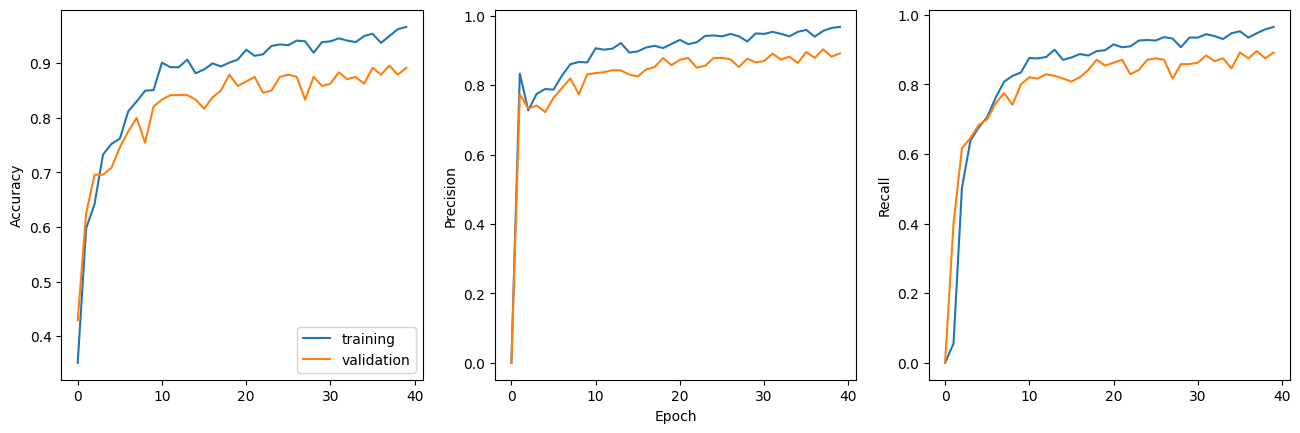

In [ ]:
plt.subplots_adjust(right=1.95, left=.03)

plt.subplot(1,3,1)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('')
plt.legend(['training','validation'], loc="lower right")

plt.subplot(1,3,2)
plt.plot(history4.history['precision_5'])
plt.plot(history4.history['val_precision_5'])
plt.ylabel('Precision')
plt.xlabel('Epoch')

plt.subplot(1,3,3)
plt.plot(history4.history['recall_5'])
plt.plot(history4.history['val_recall_5'])
plt.ylabel('Recall')
plt.xlabel('')


plt.show()

In [ ]:
test_loss, test_acc, test_precision, test_recall = model4.evaluate(test_ds)
print('%s %.2f' % ('validation_acc: ', test_acc*100.0 ))
print('%s %.2f' % ('validation_loss:', test_loss ))
print('%s %.2f' % ('validation_precision:', test_precision ))
print('%s %.2f' % ('validation_recall:', test_recall ))

8/8 [==============================] - 2s 239ms/step - loss: 0.2823 - accuracy: 0.9042 - precision_5: 0.9034 - recall_5: 0.8958
validation_acc:  90.42
validation_loss: 0.28
validation_precision: 0.90
validation_recall: 0.90


## Task 3: Effects of Augmentation

Create a model

In [ ]:
model5 = models.Sequential()
model5.add(layers.Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape = train_ds.image_shape ) )
model5.add(layers.MaxPooling2D(4, 4) )
model5.add(layers.Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model5.add(layers.MaxPooling2D(2, 2) )
model5.add(layers.Conv2D( 8, ( 3, 3 ), activation = 'relu' ) )
model5.add( Flatten() )
model5.add( Dense( 32, activation = 'relu' ) )
model5.add( Dense( 3, activation = 'softmax' ) )
model5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 29, 29, 16)        4624      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 12, 12, 8)         1160      
                                                                 
 flatten_6 (Flatten)         (None, 1152)             

Horizontal Flip

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255, horizontal_flip=True,width_shift_range=0.2, height_shift_range=0.2)
train_ds = datagen.flow_from_directory(
  './bears/training/',
  target_size=(128, 128),
  shuffle=True,
  batch_size=32)

valid_ds = datagen.flow_from_directory(
  './bears/validation/',
  target_size=(128, 128),
  shuffle=True,
  batch_size=32)

test_ds = datagen.flow_from_directory(
  './bears/test/',
  target_size=(128, 128),
  shuffle=True,
  batch_size=32)

Found 718 images belonging to 3 classes.
Found 240 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


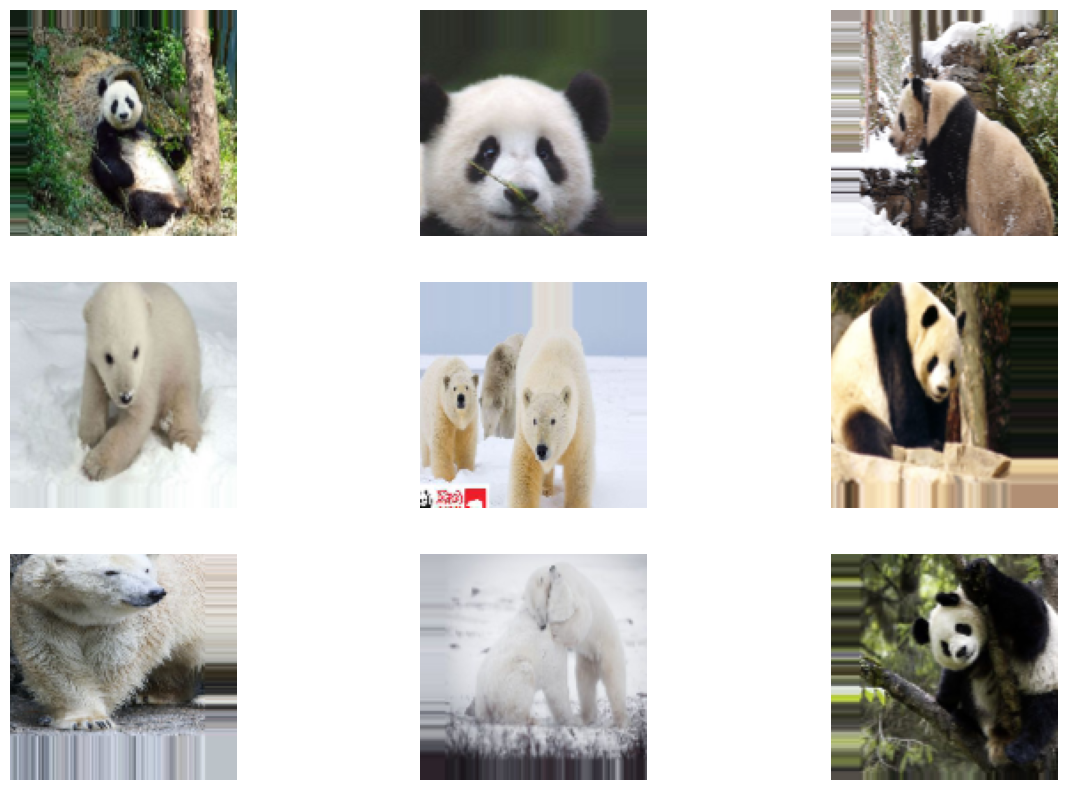

In [ ]:
N=3
plt.figure (figsize = (15,10))
for my_batch in train_ds:
  images = my_batch[0]
  labels = my_batch[1]
  for x in range(0,3):
    for y in range(0,3):
      plt.subplot(N,N,x*N+y+1)
      plt.axis('off')
      plt.imshow(images[x*N+y])
  break

In [ ]:
#from tensorflow.keras.metrics import Precision, Recall
model5.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy', Precision(), Recall()] )
history5 = model5.fit(train_ds, validation_data = valid_ds, epochs = 40, batch_size = 64, callbacks = [callback] )

Epoch 1/40
23/23 [==============================] - 13s 433ms/step - loss: 1.0491 - accuracy: 0.4206 - precision_8: 0.8611 - recall_8: 0.0432 - val_loss: 0.9087 - val_accuracy: 0.5250 - val_precision_8: 0.7500 - val_recall_8: 0.2875
Epoch 2/40
23/23 [==============================] - 9s 383ms/step - loss: 0.7747 - accuracy: 0.6309 - precision_8: 0.7277 - recall_8: 0.4763 - val_loss: 0.7569 - val_accuracy: 0.6417 - val_precision_8: 0.7127 - val_recall_8: 0.5375
Epoch 3/40
23/23 [==============================] - 8s 359ms/step - loss: 0.6379 - accuracy: 0.7298 - precision_8: 0.7750 - recall_8: 0.6476 - val_loss: 0.7234 - val_accuracy: 0.6250 - val_precision_8: 0.6498 - val_recall_8: 0.5875
Epoch 4/40
23/23 [==============================] - 9s 404ms/step - loss: 0.6692 - accuracy: 0.6825 - precision_8: 0.7271 - recall_8: 0.6421 - val_loss: 0.6595 - val_accuracy: 0.7417 - val_precision_8: 0.7830 - val_recall_8: 0.6917
Epoch 5/40
23/23 [==============================] - 9s 403ms/step - los

Plot the Accuracy, Precision, and Recall

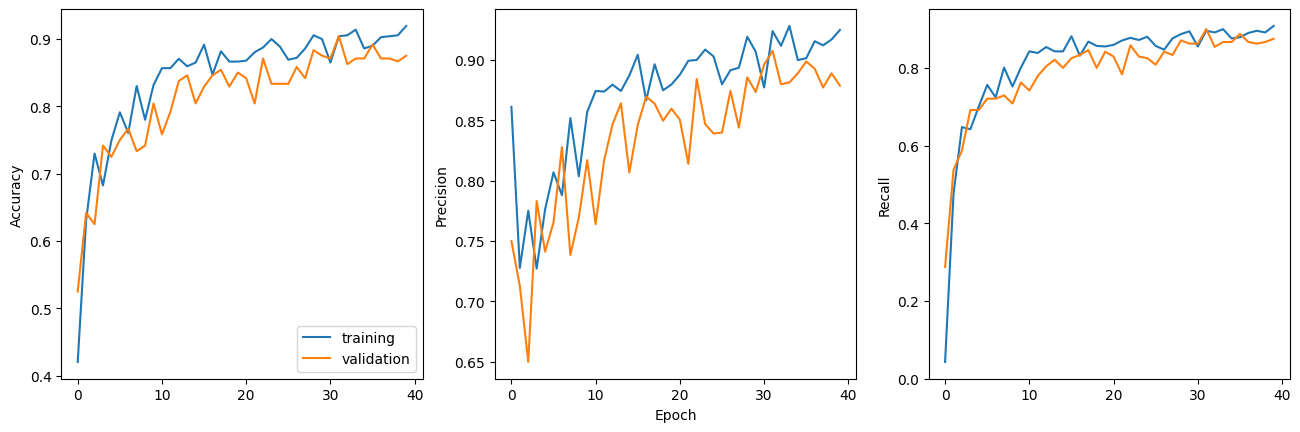

In [ ]:
plt.subplots_adjust(right=1.95, left=.03)

plt.subplot(1,3,1)
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('')
plt.legend(['training','validation'], loc="lower right")

plt.subplot(1,3,2)
plt.plot(history5.history['precision_8'])
plt.plot(history5.history['val_precision_8'])
plt.ylabel('Precision')
plt.xlabel('Epoch')

plt.subplot(1,3,3)
plt.plot(history5.history['recall_8'])
plt.plot(history5.history['val_recall_8'])
plt.ylabel('Recall')
plt.xlabel('')


plt.show()

In [ ]:
test_loss, test_acc, test_precision, test_recall = model5.evaluate(test_ds)
print('%s %.2f' % ('validation_acc: ', test_acc*100.0 ))
print('%s %.2f' % ('validation_loss:', test_loss ))
print('%s %.2f' % ('validation_precision:', test_precision ))
print('%s %.2f' % ('validation_recall:', test_recall ))

8/8 [==============================] - 3s 341ms/step - loss: 0.3815 - accuracy: 0.8667 - precision_8: 0.8776 - recall_8: 0.8667
validation_acc:  86.67
validation_loss: 0.38
validation_precision: 0.88
validation_recall: 0.87


Augmentation: Random Rotation between -90 and 90 degrees

In [ ]:
model6 = models.Sequential()
model6.add(layers.Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape = train_ds.image_shape ) )
model6.add(layers.MaxPooling2D(4, 4) )
model6.add(layers.Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model6.add(layers.MaxPooling2D(2, 2) )
model6.add(layers.Conv2D( 8, ( 3, 3 ), activation = 'relu' ) )
model6.add( Flatten() )
model6.add( Dense( 32, activation = 'relu' ) )
model6.add( Dense( 3, activation = 'softmax' ) )
model6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 29, 29, 16)        4624      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 12, 12, 8)         1160      
                                                                 
 flatten_7 (Flatten)         (None, 1152)             

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, rotation_range=90, width_shift_range=0.2, height_shift_range=0.2)
train_ds = datagen.flow_from_directory(
  './bears/training/',
  target_size=(128, 128),
  shuffle=True,
  batch_size=32)

valid_ds = datagen.flow_from_directory(
  './bears/validation/',
  target_size=(128, 128),
  shuffle=True,
  batch_size=32)

test_ds = datagen.flow_from_directory(
  './bears/test/',
  target_size=(128, 128),
  shuffle=True,
  batch_size=32)

Found 718 images belonging to 3 classes.
Found 240 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


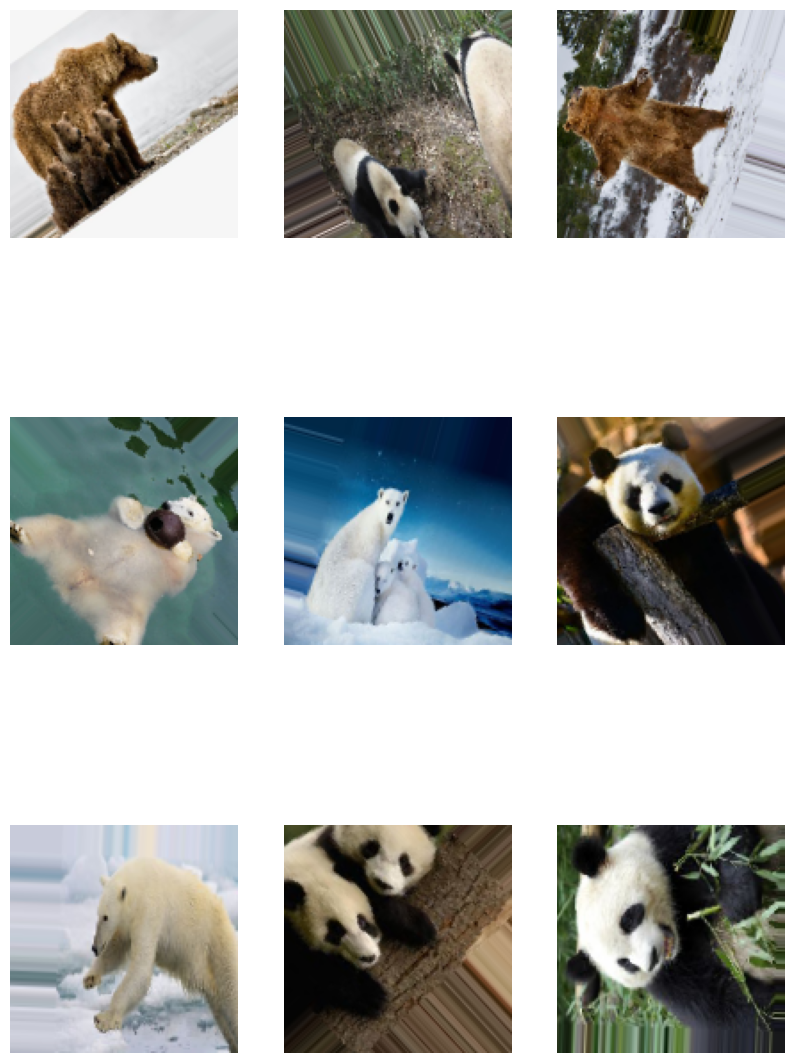

In [ ]:
N=3
plt.figure (figsize = (10,15))
for my_batch in train_ds:
  images = my_batch[0]
  labels = my_batch[1]
  for x in range(0,3):
    for y in range(0,3):
      plt.subplot(N,N,x*N+y+1)
      plt.axis('off')
      plt.imshow(images[x*N+y])
  break

In [ ]:
model6.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy', Precision(), Recall()] )
history6 = model6.fit(train_ds, validation_data = valid_ds, epochs = 40, batch_size = 64, callbacks = [callback] )

Epoch 1/40
23/23 [==============================] - 11s 407ms/step - loss: 1.1063 - accuracy: 0.3579 - precision_9: 0.0000e+00 - recall_9: 0.0000e+00 - val_loss: 1.1004 - val_accuracy: 0.4333 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00
Epoch 2/40
23/23 [==============================] - 8s 365ms/step - loss: 1.0461 - accuracy: 0.5153 - precision_9: 0.8750 - recall_9: 0.0390 - val_loss: 0.9832 - val_accuracy: 0.4583 - val_precision_9: 0.8281 - val_recall_9: 0.2208
Epoch 3/40
23/23 [==============================] - 9s 407ms/step - loss: 0.8208 - accuracy: 0.6072 - precision_9: 0.7112 - recall_9: 0.4526 - val_loss: 0.7895 - val_accuracy: 0.6417 - val_precision_9: 0.6868 - val_recall_9: 0.5208
Epoch 4/40
23/23 [==============================] - 9s 406ms/step - loss: 0.7254 - accuracy: 0.6727 - precision_9: 0.7050 - recall_9: 0.5724 - val_loss: 0.7510 - val_accuracy: 0.6208 - val_precision_9: 0.6703 - val_recall_9: 0.5083
Epoch 5/40
23/23 [==============================] - 9s 

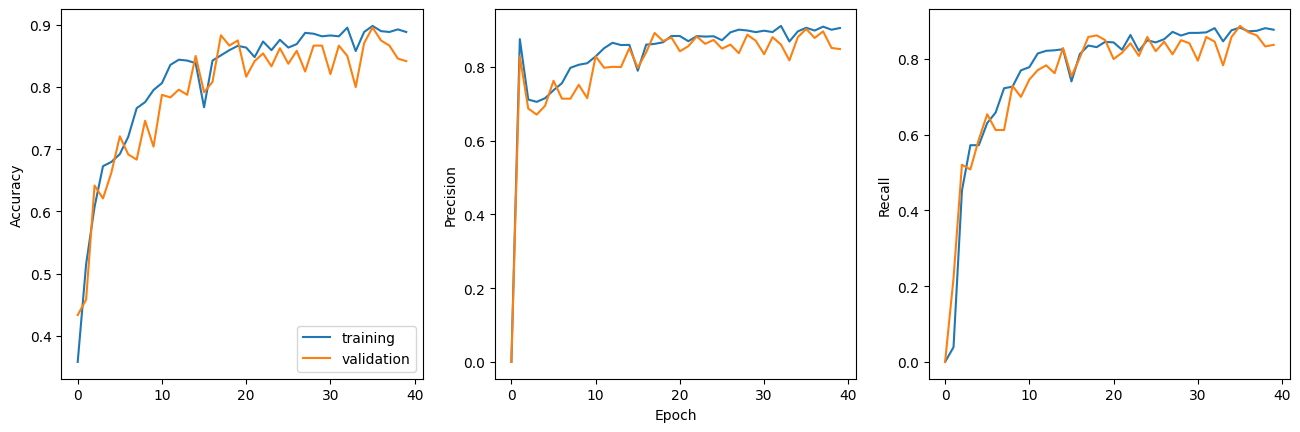

In [ ]:
plt.subplots_adjust(right=1.95, left=.03)

plt.subplot(1,3,1)
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('')
plt.legend(['training','validation'], loc="lower right")

plt.subplot(1,3,2)
plt.plot(history6.history['precision_9'])
plt.plot(history6.history['val_precision_9'])
plt.ylabel('Precision')
plt.xlabel('Epoch')

plt.subplot(1,3,3)
plt.plot(history6.history['recall_9'])
plt.plot(history6.history['val_recall_9'])
plt.ylabel('Recall')
plt.xlabel('')

plt.show()

In [ ]:
test_loss, test_acc, test_precision, test_recall = model6.evaluate(test_ds)
print('%s %.2f' % ('validation_acc: ', test_acc*100.0 ))
print('%s %.2f' % ('validation_loss:', test_loss ))
print('%s %.2f' % ('validation_precision:', test_precision ))
print('%s %.2f' % ('validation_recall:', test_recall ))

8/8 [==============================] - 2s 240ms/step - loss: 0.4022 - accuracy: 0.8458 - precision_9: 0.8517 - recall_9: 0.8375
validation_acc:  84.58
validation_loss: 0.40
validation_precision: 0.85
validation_recall: 0.84


Augmentation: Zoom

In [ ]:
model7 = models.Sequential()
model7.add(layers.Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape = train_ds.image_shape ) )
model7.add(layers.MaxPooling2D(4, 4) )
model7.add(layers.Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model7.add(layers.MaxPooling2D(2, 2) )
model7.add(layers.Conv2D( 8, ( 3, 3 ), activation = 'relu' ) )
model7.add( Flatten() )
model7.add( Dense( 32, activation = 'relu' ) )
model7.add( Dense( 3, activation = 'softmax' ) )
model7.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 29, 29, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 12, 12, 8)         1160      
                                                                 
 flatten_8 (Flatten)         (None, 1152)             

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2)
train_ds = datagen.flow_from_directory(
  './bears/training/',
  target_size=(128, 128),
  shuffle=True,
  batch_size=32)

valid_ds = datagen.flow_from_directory(
  './bears/validation/',
  target_size=(128, 128),
  shuffle=True,
  batch_size=32)

test_ds = datagen.flow_from_directory(
  './bears/test/',
  target_size=(128, 128),
  shuffle=True,
  batch_size=32)

Found 718 images belonging to 3 classes.
Found 240 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


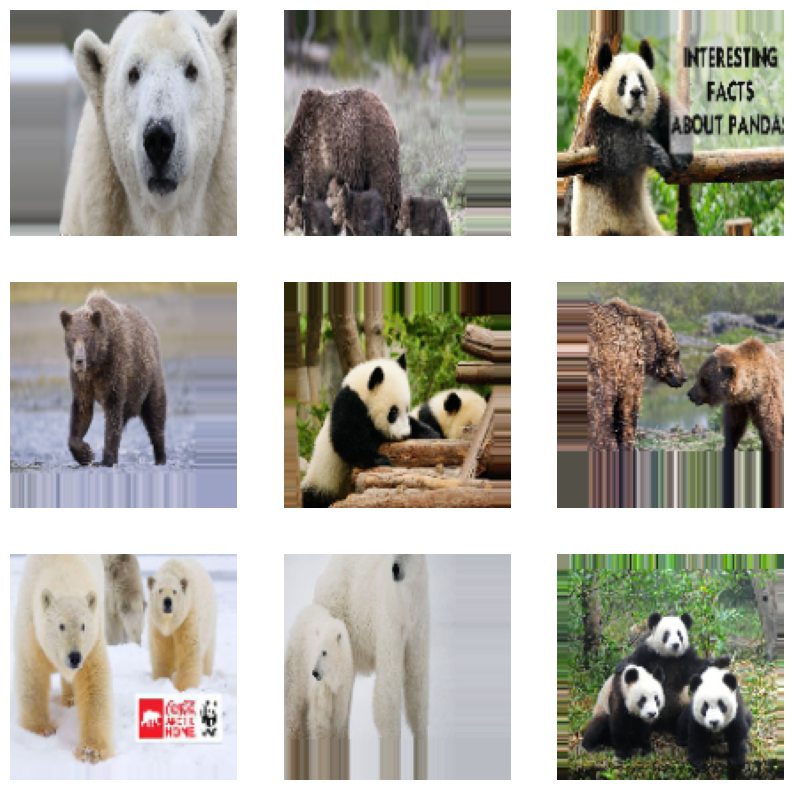

In [ ]:
N=3
plt.figure (figsize = (10,10))
for my_batch in train_ds:
  images = my_batch[0]
  labels = my_batch[1]
  for x in range(0,3):
    for y in range(0,3):
      plt.subplot(N,N,x*N+y+1)
      plt.axis('off')
      plt.imshow(images[x*N+y])
  break

In [ ]:
model7.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy', Precision(), Recall()] )
history7 = model7.fit(train_ds, validation_data = valid_ds, epochs = 40, batch_size = 64, callbacks = [callback] )

Epoch 1/40
23/23 [==============================] - 11s 398ms/step - loss: 0.9455 - accuracy: 0.5543 - precision_10: 0.7824 - recall_10: 0.2103 - val_loss: 0.7524 - val_accuracy: 0.6958 - val_precision_10: 0.7651 - val_recall_10: 0.5292
Epoch 2/40
23/23 [==============================] - 9s 399ms/step - loss: 0.6402 - accuracy: 0.7368 - precision_10: 0.7892 - recall_10: 0.6727 - val_loss: 0.6434 - val_accuracy: 0.7375 - val_precision_10: 0.7600 - val_recall_10: 0.7125
Epoch 3/40
23/23 [==============================] - 9s 398ms/step - loss: 0.6135 - accuracy: 0.7382 - precision_10: 0.7709 - recall_10: 0.7075 - val_loss: 0.7414 - val_accuracy: 0.6750 - val_precision_10: 0.7022 - val_recall_10: 0.6583
Epoch 4/40
23/23 [==============================] - 9s 402ms/step - loss: 0.5621 - accuracy: 0.7841 - precision_10: 0.8061 - recall_10: 0.7409 - val_loss: 0.5477 - val_accuracy: 0.8000 - val_precision_10: 0.8037 - val_recall_10: 0.7333
Epoch 5/40
23/23 [==============================] - 9s 

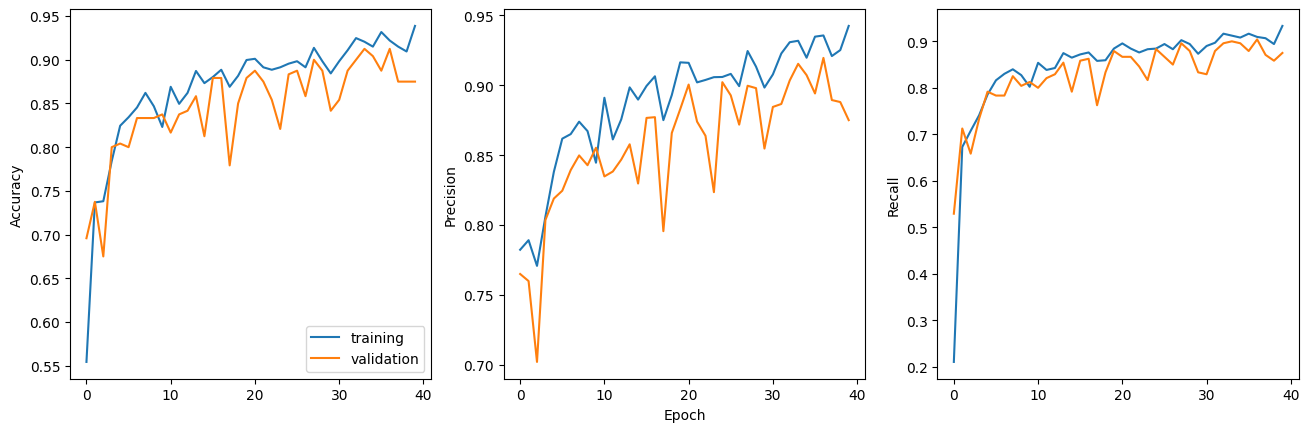

In [ ]:
plt.subplots_adjust(right=1.95, left=.03)

plt.subplot(1,3,1)
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('')
plt.legend(['training','validation'], loc="lower right")

plt.subplot(1,3,2)
plt.plot(history7.history['precision_10'])
plt.plot(history7.history['val_precision_10'])
plt.ylabel('Precision')
plt.xlabel('Epoch')

plt.subplot(1,3,3)
plt.plot(history7.history['recall_10'])
plt.plot(history7.history['val_recall_10'])
plt.ylabel('Recall')
plt.xlabel('')

plt.show()

In [ ]:
test_loss, test_acc, test_precision, test_recall = model7.evaluate(test_ds)
print('%s %.2f' % ('validation_acc: ', test_acc*100.0 ))
print('%s %.2f' % ('validation_loss:', test_loss ))
print('%s %.2f' % ('validation_precision:', test_precision ))
print('%s %.2f' % ('validation_recall:', test_recall ))

8/8 [==============================] - 3s 359ms/step - loss: 0.2866 - accuracy: 0.8708 - precision_10: 0.8932 - recall_10: 0.8708
validation_acc:  87.08
validation_loss: 0.29
validation_precision: 0.89
validation_recall: 0.87


### Task 4: Effects of Regularization

Batch Normalization

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255)

train_ds = datagen.flow_from_directory(
  './bears/training/',
  target_size=(48, 48),
  shuffle=True,
  batch_size=32)

valid_ds = datagen.flow_from_directory(
  './bears/validation/',
  target_size=(48, 48),
  shuffle=True,
  batch_size=32)

test_ds = datagen.flow_from_directory(
    './bears/test/',
    target_size=(48, 48),
    shuffle=True,
    batch_size=32
)

Found 718 images belonging to 3 classes.
Found 240 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


In [ ]:
model8 = models.Sequential()
model8.add(BatchNormalization())
model8.add(layers.Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape = train_ds.image_shape ) )
model8.add(layers.MaxPooling2D(4, 4) )
model8.add(BatchNormalization())
model8.add(layers.Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model8.add(layers.MaxPooling2D(2, 2) )
model8.add(BatchNormalization())
model8.add(layers.Conv2D( 8, ( 3, 3 ), activation = 'relu' ) )
model8.add( Flatten() )
model8.add( Dense( 8, activation = 'relu' ) )
model8.add( Dense( 3, activation = 'softmax' ) )
#model8.summary()

In [ ]:
model8.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy', Precision(), Recall()] )
history8 = model8.fit(train_ds, validation_data = valid_ds, epochs = 40, batch_size = 64, callbacks = [callback] )

Epoch 1/40
23/23 [==============================] - 8s 239ms/step - loss: 0.9441 - accuracy: 0.5223 - precision_12: 0.6274 - recall_12: 0.3705 - val_loss: 1.0266 - val_accuracy: 0.5333 - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00
Epoch 2/40
23/23 [==============================] - 5s 225ms/step - loss: 0.5713 - accuracy: 0.7883 - precision_12: 0.8818 - recall_12: 0.6546 - val_loss: 0.9744 - val_accuracy: 0.5917 - val_precision_12: 0.9423 - val_recall_12: 0.2042
Epoch 3/40
23/23 [==============================] - 5s 237ms/step - loss: 0.3867 - accuracy: 0.8677 - precision_12: 0.9163 - recall_12: 0.8231 - val_loss: 1.0665 - val_accuracy: 0.6083 - val_precision_12: 0.8025 - val_recall_12: 0.5250
Epoch 4/40
23/23 [==============================] - 6s 271ms/step - loss: 0.2817 - accuracy: 0.9095 - precision_12: 0.9304 - recall_12: 0.8747 - val_loss: 1.2843 - val_accuracy: 0.5292 - val_precision_12: 0.5604 - val_recall_12: 0.4833
Epoch 5/40
23/23 [==============================

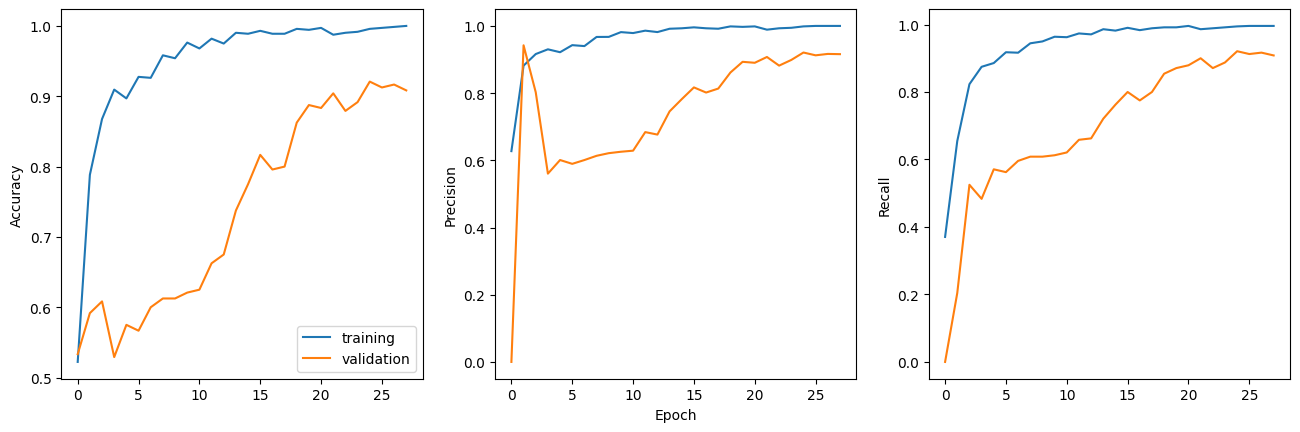

In [ ]:
plt.subplots_adjust(right=1.95, left=.03)

plt.subplot(1,3,1)
plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('')
plt.legend(['training','validation'], loc="lower right")

plt.subplot(1,3,2)
plt.plot(history8.history['precision_12'])
plt.plot(history8.history['val_precision_12'])
plt.ylabel('Precision')
plt.xlabel('Epoch')

plt.subplot(1,3,3)
plt.plot(history8.history['recall_12'])
plt.plot(history8.history['val_recall_12'])
plt.ylabel('Recall')
plt.xlabel('')

plt.show()

In [ ]:
test_loss, test_acc, test_precision, test_recall = model8.evaluate(test_ds)
print('%s %.2f' % ('validation_acc: ', test_acc*100.0 ))
print('%s %.2f' % ('validation_loss:', test_loss ))
print('%s %.2f' % ('validation_precision:', test_precision ))
print('%s %.2f' % ('validation_recall:', test_recall ))

8/8 [==============================] - 2s 227ms/step - loss: 0.5520 - accuracy: 0.8667 - precision_12: 0.8667 - recall_12: 0.8667
validation_acc:  86.67
validation_loss: 0.55
validation_precision: 0.87
validation_recall: 0.87


BatchNormalization and Dropout

In [ ]:
model9 = models.Sequential()
model9.add(BatchNormalization())
model9.add(layers.Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape = train_ds.image_shape ) )
model9.add(layers.MaxPooling2D(4, 4) )
model9.add(Dropout(rate=0.2))
model9.add(BatchNormalization())
model9.add(layers.Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model9.add(layers.MaxPooling2D(2, 2) )
model9.add(Dropout(rate=0.2))
model9.add(BatchNormalization())
model9.add(layers.Conv2D( 8, ( 3, 3 ), activation = 'relu' ) )
model9.add( Flatten() )
model9.add( Dense( 8, activation = 'relu' ) )
model9.add( Dense( 3, activation = 'softmax' ) )
#model9.summary()

In [ ]:
model9.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy', Precision(), Recall()] )
history9 = model9.fit(train_ds, validation_data = valid_ds, epochs = 40, batch_size = 64, callbacks = [callback] )

Epoch 1/40
23/23 [==============================] - 9s 268ms/step - loss: 1.0042 - accuracy: 0.5125 - precision_13: 0.5860 - recall_13: 0.3370 - val_loss: 1.1479 - val_accuracy: 0.3250 - val_precision_13: 0.7647 - val_recall_13: 0.1083
Epoch 2/40
23/23 [==============================] - 6s 270ms/step - loss: 0.6873 - accuracy: 0.7354 - precision_13: 0.8073 - recall_13: 0.6128 - val_loss: 1.3593 - val_accuracy: 0.3083 - val_precision_13: 0.3136 - val_recall_13: 0.3083
Epoch 3/40
23/23 [==============================] - 5s 231ms/step - loss: 0.4863 - accuracy: 0.8120 - precision_13: 0.8483 - recall_13: 0.7632 - val_loss: 1.6670 - val_accuracy: 0.3083 - val_precision_13: 0.3096 - val_recall_13: 0.3083
Epoch 4/40
23/23 [==============================] - 6s 253ms/step - loss: 0.4306 - accuracy: 0.8287 - precision_13: 0.8546 - recall_13: 0.8106 - val_loss: 1.7823 - val_accuracy: 0.3083 - val_precision_13: 0.3083 - val_recall_13: 0.3083
Epoch 5/40
23/23 [==============================] - 5s 2

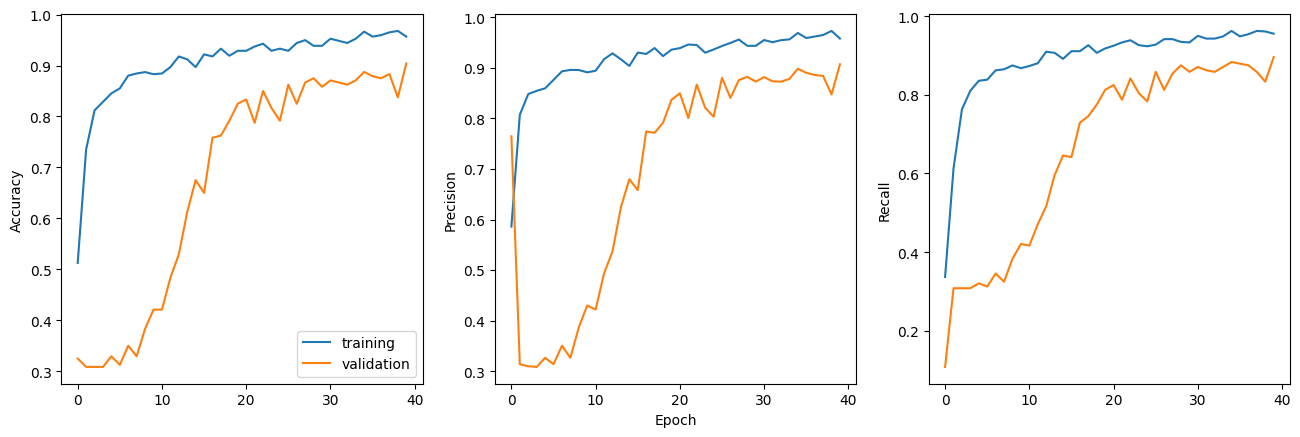

In [ ]:
plt.subplots_adjust(right=1.95, left=.03)

plt.subplot(1,3,1)
plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('')
plt.legend(['training','validation'], loc="lower right")

plt.subplot(1,3,2)
plt.plot(history9.history['precision_13'])
plt.plot(history9.history['val_precision_13'])
plt.ylabel('Precision')
plt.xlabel('Epoch')

plt.subplot(1,3,3)
plt.plot(history9.history['recall_13'])
plt.plot(history9.history['val_recall_13'])
plt.ylabel('Recall')
plt.xlabel('')

plt.show()

In [ ]:
test_loss, test_acc, test_precision, test_recall = model9.evaluate(test_ds)
print('%s %.2f' % ('validation_acc: ', test_acc*100.0 ))
print('%s %.2f' % ('validation_loss:', test_loss ))
print('%s %.2f' % ('validation_precision:', test_precision ))
print('%s %.2f' % ('validation_recall:', test_recall ))

8/8 [==============================] - 1s 150ms/step - loss: 0.3654 - accuracy: 0.8625 - precision_13: 0.8692 - recall_13: 0.8583
validation_acc:  86.25
validation_loss: 0.37
validation_precision: 0.87
validation_recall: 0.86


Batch Normalization, Dropout, and L2 Regularization

In [ ]:
model10 = models.Sequential()
model10.add(BatchNormalization())
model10.add(layers.Conv2D( 32, ( 3, 3 ), activation = 'relu', kernel_regularizer="l2", input_shape = train_ds.image_shape ) )
model10.add(layers.MaxPooling2D(4, 4) )
model10.add(Dropout(rate=0.2))
model10.add(BatchNormalization())
model10.add(layers.Conv2D( 16, ( 3, 3 ), activation = 'relu', kernel_regularizer="l2" ) )
model10.add(layers.MaxPooling2D(2, 2) )
model10.add(Dropout(rate=0.2))
model10.add(BatchNormalization())
model10.add(layers.Conv2D( 8, ( 3, 3 ), activation = 'relu', kernel_regularizer="l2" ) )
model10.add( Flatten() )
model10.add( Dense( 8, activation = 'relu' ) )
model10.add( Dense( 3, activation = 'softmax' ) )
#model10.summary()

In [ ]:
model10.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy', Precision(), Recall()] )
history10 = model10.fit(train_ds, validation_data = valid_ds, epochs = 40, batch_size = 64, callbacks = [callback] )

Epoch 1/40
23/23 [==============================] - 10s 268ms/step - loss: 1.4167 - accuracy: 0.4220 - precision_14: 0.4431 - recall_14: 0.2006 - val_loss: 1.4548 - val_accuracy: 0.4542 - val_precision_14: 0.0000e+00 - val_recall_14: 0.0000e+00
Epoch 2/40
23/23 [==============================] - 6s 272ms/step - loss: 1.1355 - accuracy: 0.6699 - precision_14: 0.7740 - recall_14: 0.4721 - val_loss: 1.4323 - val_accuracy: 0.3208 - val_precision_14: 0.0000e+00 - val_recall_14: 0.0000e+00
Epoch 3/40
23/23 [==============================] - 7s 292ms/step - loss: 0.9212 - accuracy: 0.8022 - precision_14: 0.8510 - recall_14: 0.7159 - val_loss: 1.3951 - val_accuracy: 0.3417 - val_precision_14: 0.7386 - val_recall_14: 0.2708
Epoch 4/40
23/23 [==============================] - 5s 226ms/step - loss: 0.7713 - accuracy: 0.8468 - precision_14: 0.8778 - recall_14: 0.8106 - val_loss: 1.4383 - val_accuracy: 0.3208 - val_precision_14: 0.3627 - val_recall_14: 0.3083
Epoch 5/40
23/23 [=====================

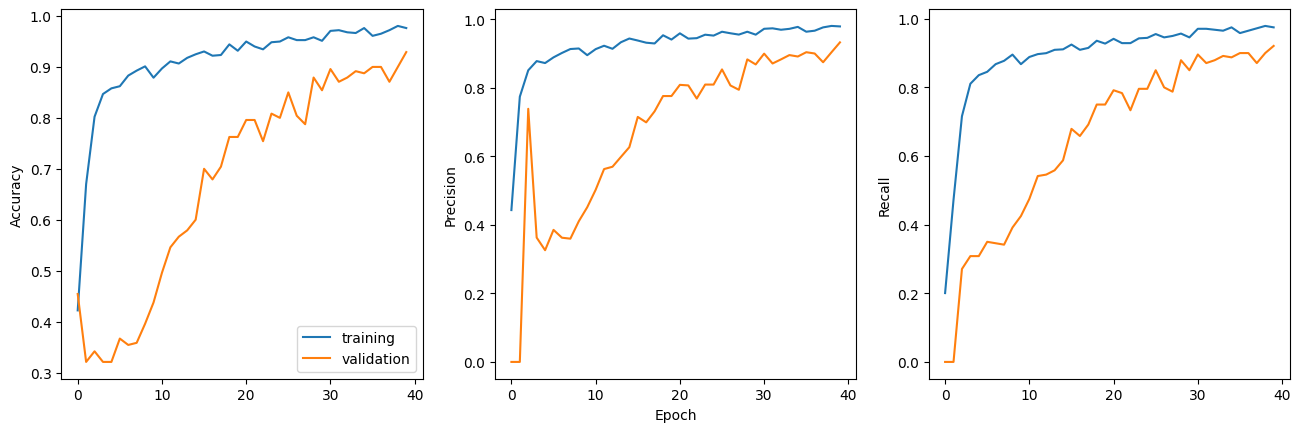

In [ ]:
plt.subplots_adjust(right=1.95, left=.03)

plt.subplot(1,3,1)
plt.plot(history10.history['accuracy'])
plt.plot(history10.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('')
plt.legend(['training','validation'], loc="lower right")

plt.subplot(1,3,2)
plt.plot(history10.history['precision_14'])
plt.plot(history10.history['val_precision_14'])
plt.ylabel('Precision')
plt.xlabel('Epoch')

plt.subplot(1,3,3)
plt.plot(history10.history['recall_14'])
plt.plot(history10.history['val_recall_14'])
plt.ylabel('Recall')
plt.xlabel('')

plt.show()

In [ ]:
test_loss, test_acc, test_precision, test_recall = model10.evaluate(test_ds)
print('%s %.2f' % ('validation_acc: ', test_acc*100.0 ))
print('%s %.2f' % ('validation_loss:', test_loss ))
print('%s %.2f' % ('validation_precision:', test_precision ))
print('%s %.2f' % ('validation_recall:', test_recall ))

8/8 [==============================] - 1s 147ms/step - loss: 0.3786 - accuracy: 0.8958 - precision_14: 0.9025 - recall_14: 0.8875
validation_acc:  89.58
validation_loss: 0.38
validation_precision: 0.90
validation_recall: 0.89


### Task 5: Using Pre-trained models and recent architectures

In [ ]:
from tensorflow.keras.applications import ResNet50, DenseNet121

In [ ]:
train_ds = datagen.flow_from_directory(
  './bears/training/',
  target_size=(224, 224),
  shuffle=True,
  batch_size=32, class_mode = 'categorical')

valid_ds = datagen.flow_from_directory(
  './bears/validation/',
  target_size=(224, 224),
  shuffle=True,
  batch_size=32, class_mode = 'categorical')

test_ds = datagen.flow_from_directory(
  './bears/test/',
  target_size=(224, 224),
  shuffle=True,
  batch_size=32, class_mode = 'categorical')

Found 718 images belonging to 3 classes.
Found 240 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


ResNet50

In [ ]:
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
modelResnet50 = Sequential()
modelResnet50.add(resnet)
modelResnet50.add( Flatten())
modelResnet50.add( Dense(units=32, activation = 'relu' , input_dim = 7 * 7 * 2048))
modelResnet50.add( Dense(units=3, activation = 'softmax' ) )
modelResnet50.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_18 (Flatten)        (None, 100352)            0         
                                                                 
 dense_36 (Dense)            (None, 32)                3211296   
                                                                 
 dense_37 (Dense)            (None, 3)                 99        
                                                                 
Total params: 26,799,107
Trainable params: 26,745,987
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
modelResnet50.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = [ 'accuracy', Precision(), Recall()] )
historyResnet50 = modelResnet50.fit( train_ds, validation_data = valid_ds, epochs = 40, batch_size = 64, callbacks = [callback] )

Epoch 1/40
23/23 [==============================] - 41s 621ms/step - loss: 5.8635 - accuracy: 0.6421 - precision_19: 0.7596 - recall_19: 0.4401 - val_loss: 1.0985 - val_accuracy: 0.3583 - val_precision_19: 0.0000e+00 - val_recall_19: 0.0000e+00
Epoch 2/40
23/23 [==============================] - 10s 445ms/step - loss: 0.5606 - accuracy: 0.7953 - precision_19: 0.8677 - recall_19: 0.7493 - val_loss: 1.0989 - val_accuracy: 0.3083 - val_precision_19: 0.0000e+00 - val_recall_19: 0.0000e+00
Epoch 3/40
23/23 [==============================] - 10s 442ms/step - loss: 1.0685 - accuracy: 0.8106 - precision_19: 0.8512 - recall_19: 0.7730 - val_loss: 3293.8306 - val_accuracy: 0.3333 - val_precision_19: 0.3333 - val_recall_19: 0.3333
Epoch 4/40
23/23 [==============================] - 10s 445ms/step - loss: 0.7759 - accuracy: 0.8802 - precision_19: 0.8957 - recall_19: 0.8607 - val_loss: 1.4093 - val_accuracy: 0.3083 - val_precision_19: 0.3083 - val_recall_19: 0.3083
Epoch 5/40
23/23 [===============

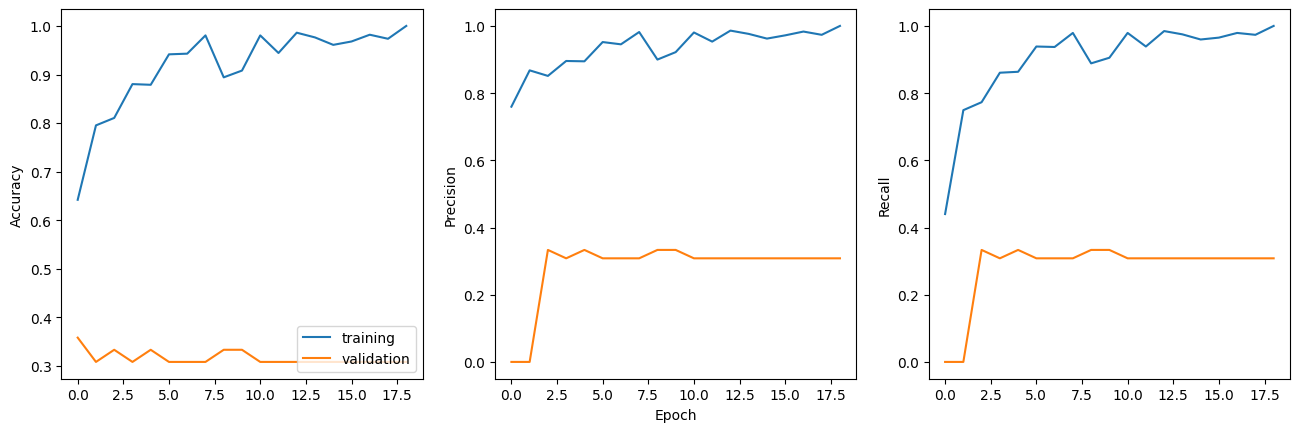

In [ ]:
plt.subplots_adjust(right=1.95, left=.03)

plt.subplot(1,3,1)
plt.plot(historyResnet50.history['accuracy'])
plt.plot(historyResnet50.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('')
plt.legend(['training','validation'], loc="lower right")

plt.subplot(1,3,2)
plt.plot(historyResnet50.history['precision_19'])
plt.plot(historyResnet50.history['val_precision_19'])
plt.ylabel('Precision')
plt.xlabel('Epoch')

plt.subplot(1,3,3)
plt.plot(historyResnet50.history['recall_19'])
plt.plot(historyResnet50.history['val_recall_19'])
plt.ylabel('Recall')
plt.xlabel('')


plt.show()

In [ ]:
test_loss, test_acc, test_precision, test_recall = modelResnet50.evaluate(test_ds)

print('%s %.2f' % ('validation_acc: ', test_acc*100.0 ))
print('%s %.2f' % ('validation_loss:', test_loss ))
print('%s %.2f' % ('validation_precision:', test_precision ))
print('%s %.2f' % ('validation_recall:', test_recall ))

8/8 [==============================] - 2s 191ms/step - loss: 1.4777 - accuracy: 0.3542 - precision_19: 0.3542 - recall_19: 0.3542
validation_acc:  35.42
validation_loss: 1.48
validation_precision: 0.35
validation_recall: 0.35


DenseNet

In [ ]:
denseNet = DenseNet121(weights='imagenet', include_top=False, input_shape=(224,224,3))
denseNet.summary()

29084464/29084464 [==============================] - 1s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_3[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                       

In [ ]:
modelDenseNet = Sequential()
modelDenseNet.add(denseNet)
modelDenseNet.add( Flatten())
modelDenseNet.add( Dense(units=32, activation = 'relu' , input_dim = 7 * 7 * 1024))
modelDenseNet.add( Dense(units=3, activation = 'softmax' ) )
modelDenseNet.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten_19 (Flatten)        (None, 50176)             0         
                                                                 
 dense_38 (Dense)            (None, 32)                1605664   
                                                                 
 dense_39 (Dense)            (None, 3)                 99        
                                                                 
Total params: 8,643,267
Trainable params: 8,559,619
Non-trainable params: 83,648
_________________________________________________________________


In [ ]:
modelDenseNet.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = [ 'accuracy', Precision(), Recall()] )
historyDenseNet = modelDenseNet.fit( train_ds, validation_data = valid_ds, epochs = 40, batch_size = 64, callbacks = [callback] )

Epoch 1/40
23/23 [==============================] - 89s 844ms/step - loss: 4.2559 - accuracy: 0.6281 - precision_20: 0.6357 - recall_20: 0.5808 - val_loss: 10.8503 - val_accuracy: 0.3875 - val_precision_20: 0.3849 - val_recall_20: 0.3833
Epoch 2/40
23/23 [==============================] - 11s 465ms/step - loss: 0.5516 - accuracy: 0.8384 - precision_20: 0.8543 - recall_20: 0.8329 - val_loss: 5137.0029 - val_accuracy: 0.3083 - val_precision_20: 0.3083 - val_recall_20: 0.3083
Epoch 3/40
23/23 [==============================] - 10s 447ms/step - loss: 0.6790 - accuracy: 0.8593 - precision_20: 0.8838 - recall_20: 0.8370 - val_loss: 126436.4297 - val_accuracy: 0.3083 - val_precision_20: 0.3083 - val_recall_20: 0.3083
Epoch 4/40
23/23 [==============================] - 10s 450ms/step - loss: 0.3604 - accuracy: 0.9039 - precision_20: 0.9326 - recall_20: 0.8858 - val_loss: 3461.6372 - val_accuracy: 0.3417 - val_precision_20: 0.3417 - val_recall_20: 0.3417
Epoch 5/40
23/23 [======================

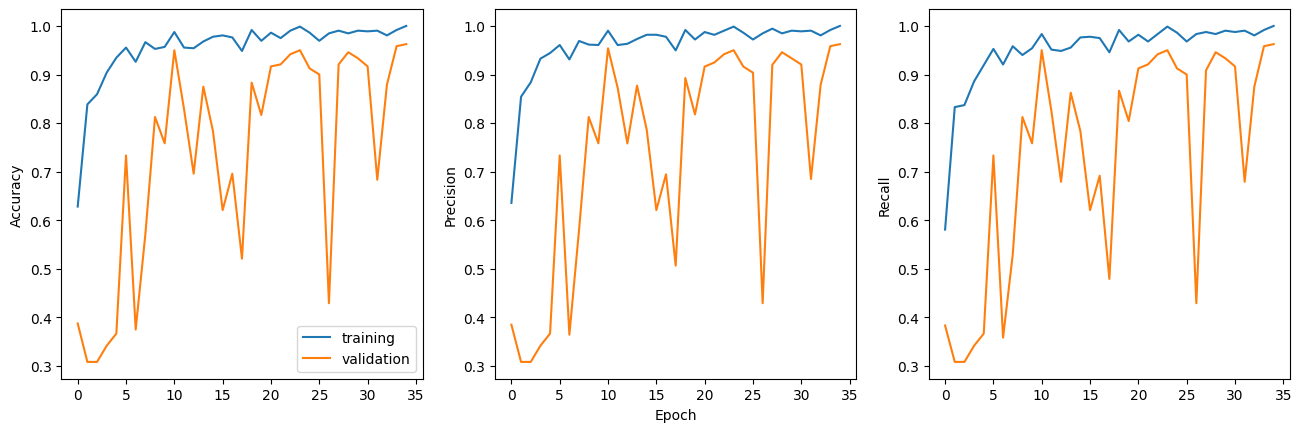

In [ ]:
plt.subplots_adjust(right=1.95, left=.03)

plt.subplot(1,3,1)
plt.plot(historyDenseNet.history['accuracy'])
plt.plot(historyDenseNet.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('')
plt.legend(['training','validation'], loc="lower right")

plt.subplot(1,3,2)
plt.plot(historyDenseNet.history['precision_20'])
plt.plot(historyDenseNet.history['val_precision_20'])
plt.ylabel('Precision')
plt.xlabel('Epoch')

plt.subplot(1,3,3)
plt.plot(historyDenseNet.history['recall_20'])
plt.plot(historyDenseNet.history['val_recall_20'])
plt.ylabel('Recall')
plt.xlabel('')

plt.show()

In [ ]:
test_loss, test_acc, test_precision, test_recall = modelDenseNet.evaluate(test_ds)
print('%s %.2f' % ('validation_acc: ', test_acc*100.0 ))
print('%s %.2f' % ('validation_loss:', test_loss ))
print('%s %.2f' % ('validation_precision:', test_precision ))
print('%s %.2f' % ('validation_recall:', test_recall ))

8/8 [==============================] - 2s 244ms/step - loss: 0.3377 - accuracy: 0.9500 - precision_20: 0.9500 - recall_20: 0.9500
validation_acc:  95.00
validation_loss: 0.34
validation_precision: 0.95
validation_recall: 0.95


Convert notebook to html

In [ ]:
%%shell
jupyter nbconvert --to html //content/Task1to6.ipynb

[NbConvertApp] Converting notebook //content/Task1to6.ipynb to html
[NbConvertApp] Writing 5006971 bytes to //content/Task1to6.html
